Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **37 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Joram Erbarth"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Heaps and Heapsort


## Question 1 [time estimate: 10 minutes]

Given the array `H=[39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]`, perform the following operations:
1. Draw the corresponding binary tree of H. Is the binary tree a valid max heap? Explain your answer.
2. Using as a model the drawing examples illustrated in Figure 6.2 of Cormen et al.,  draw a step-by-step transformation of the array above into a valid max heap. 
3. Now that you have obtained a valid max heap, write out the corresponding array that stores the valid max-heap.

Use as many cells as you wish for this question.

The local variable largest, is the index of the node from the node with the index i and its two child nodes, that has the largest values. Therefore, it should be the parent node of the theree nodes. First the algorithm finds the largest of the three nodes. If the index i is the largest, it is in the right place becasue it is already the parent node and nothing needs to be changed. If a child node is the largest node, it changes that node with the parent node. Then it checks if the new child node is the largest parent node for the next depth recursively until the node is the appropriate parent node at that place. 

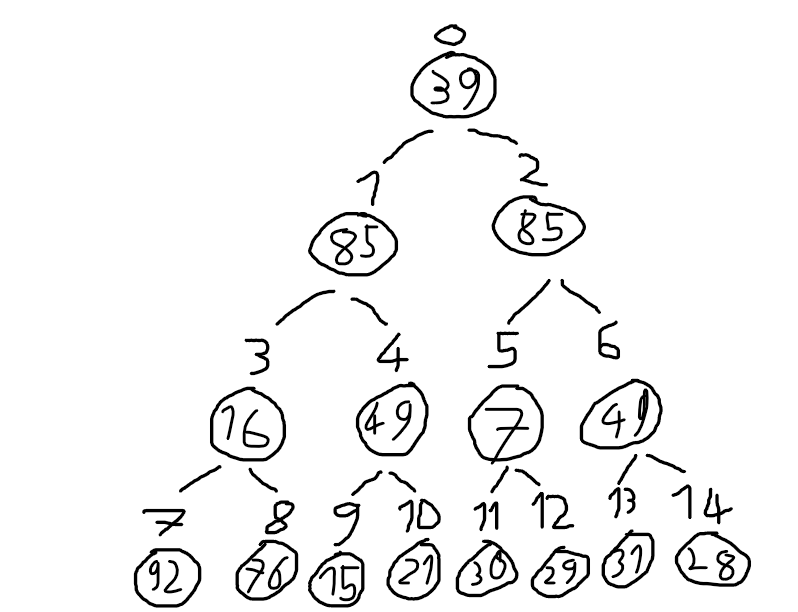

In [1]:
#2.
from IPython.display import Image
Image(filename="tree_1.png")

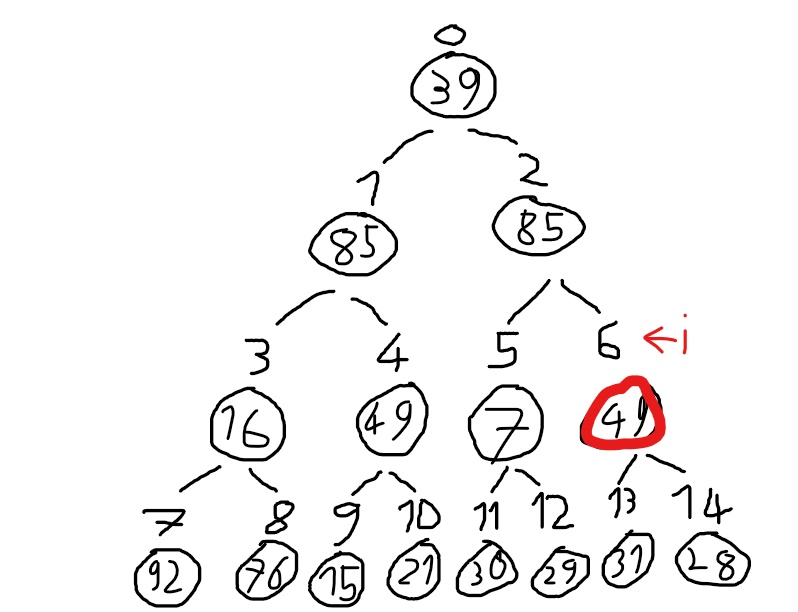

In [2]:
Image(filename="tree_2.jpg")

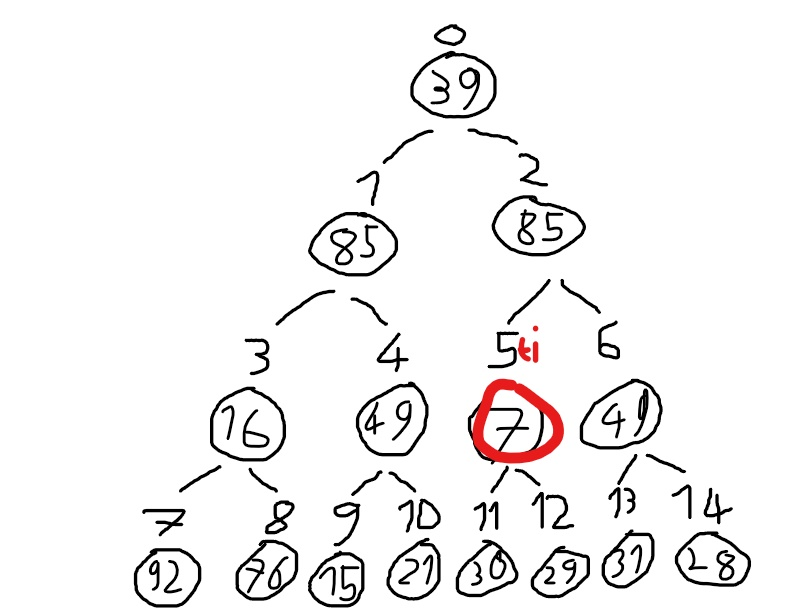

In [3]:
Image(filename="tree_3.jpg")

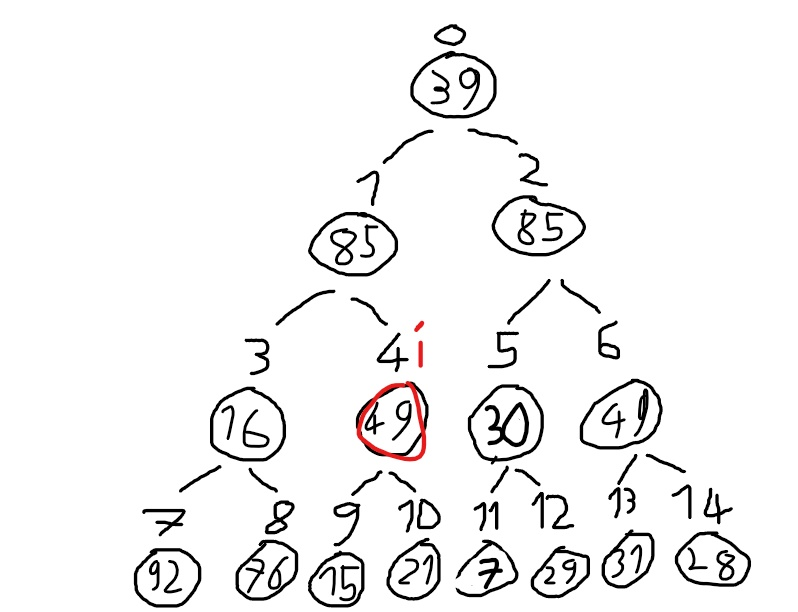

In [4]:
Image(filename="tree_4.jpg")

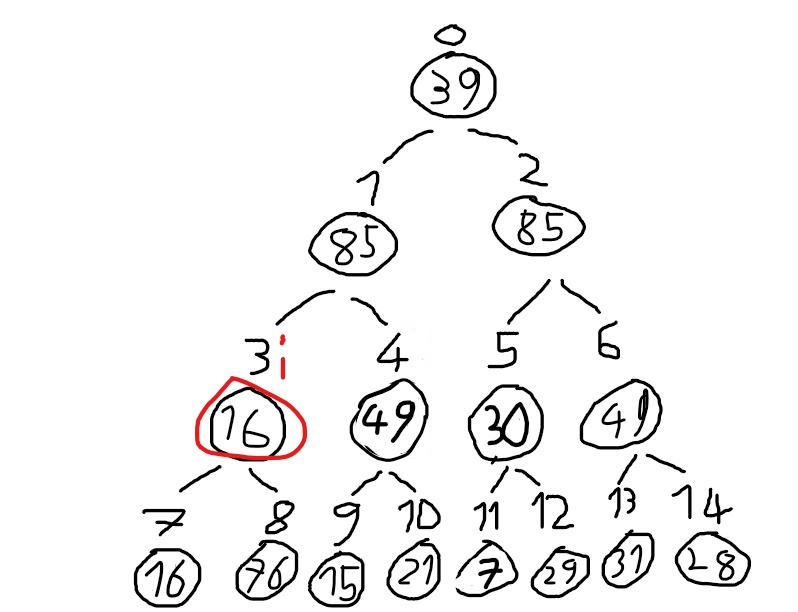

In [5]:
Image(filename="tree_5.jpg")

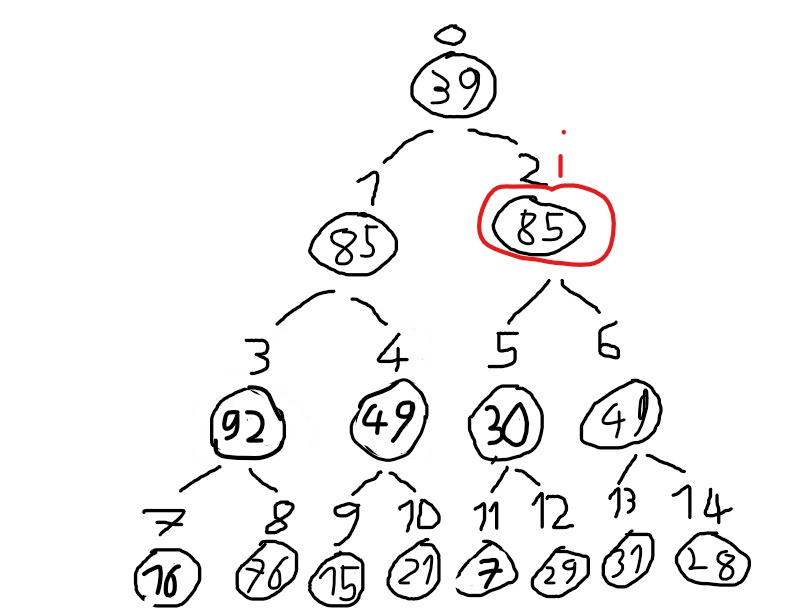

In [6]:
Image(filename="tree_6.jpg")

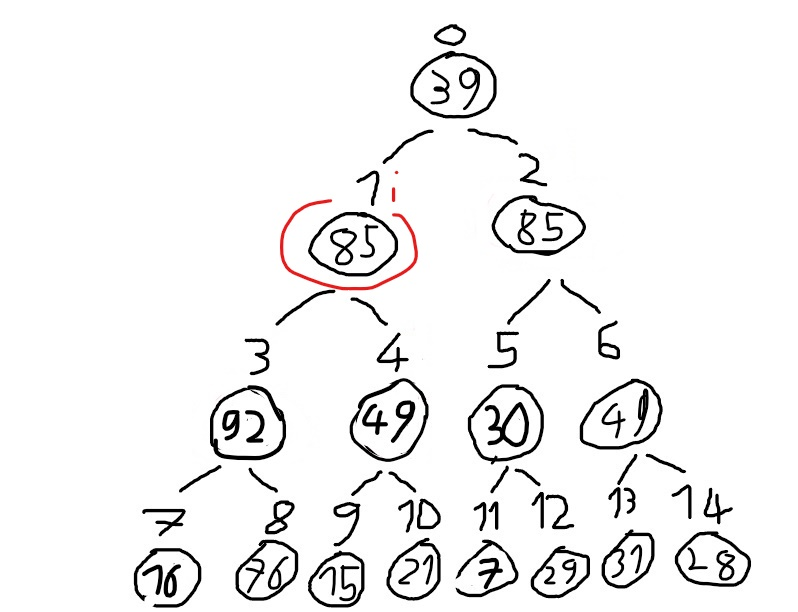

In [7]:
Image(filename="tree_7.jpg")

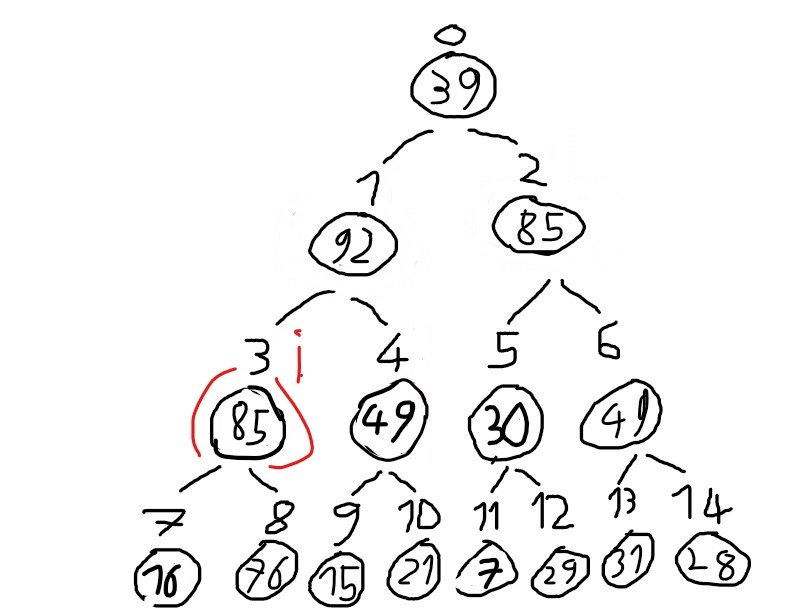

In [8]:
Image(filename="tree_8.jpg")

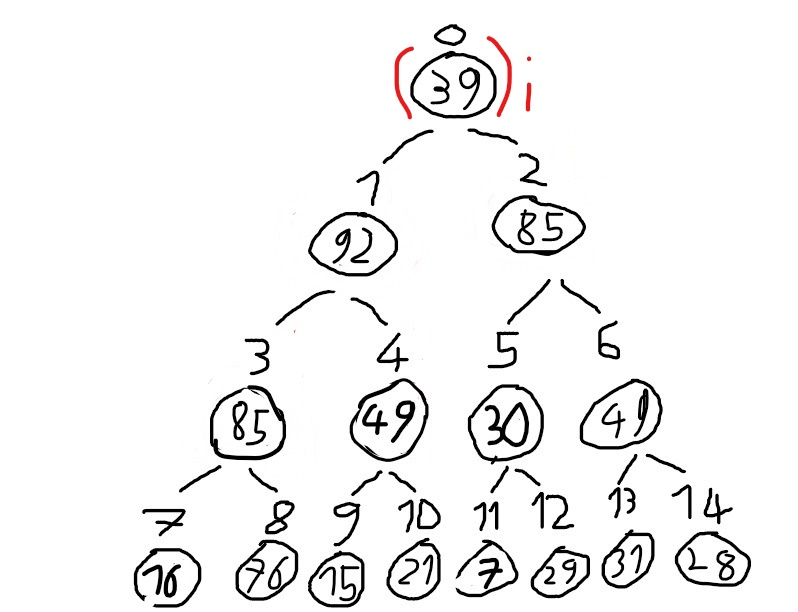

In [9]:
Image(filename="tree_9.jpg")

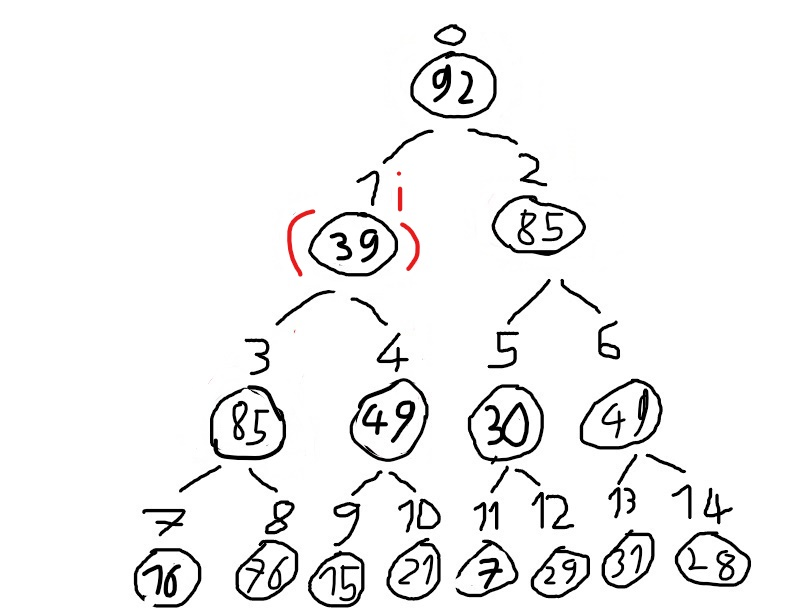

In [10]:
Image(filename="tree_10.jpg")

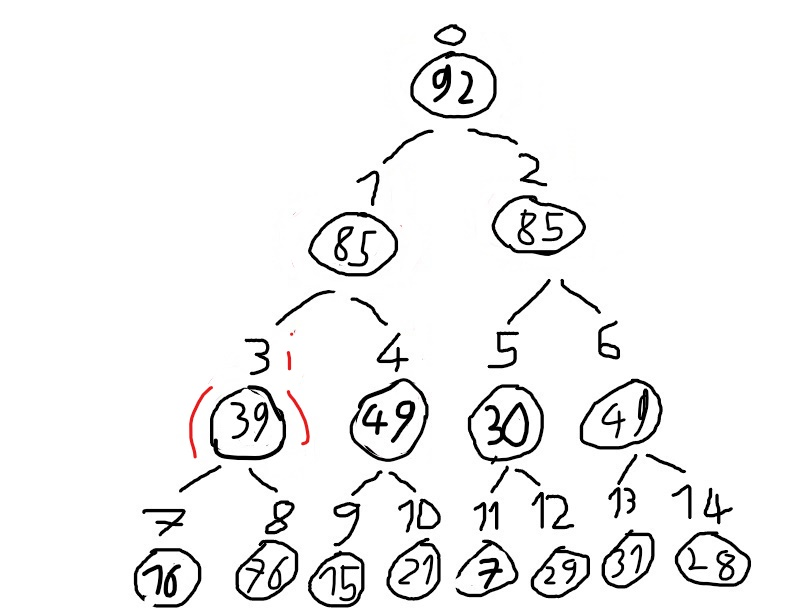

In [11]:
Image(filename="tree_11.jpg")

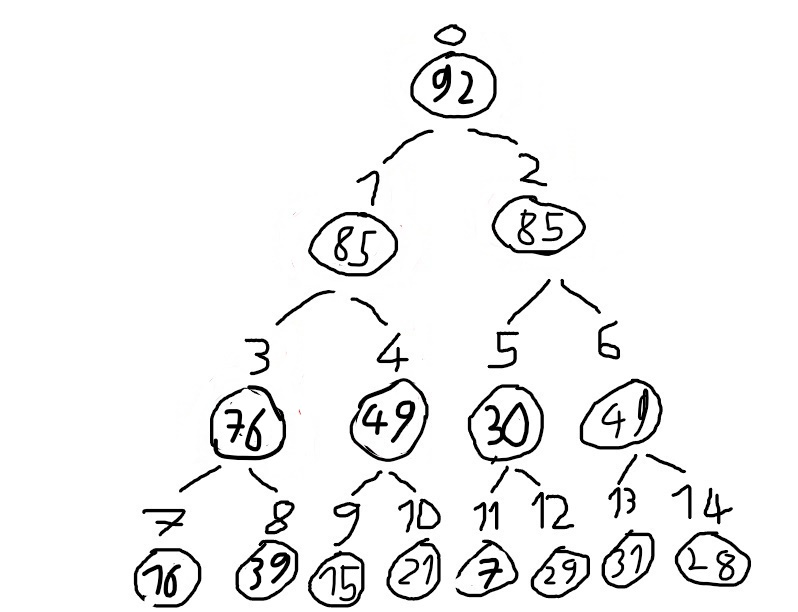

In [12]:
Image(filename="tree_12.jpg")

3.
[92, 85, 85, 76, 49, 30, 49, 16, 39, 15, 21, 7, 29, 31, 28]

## Question 2. 

Consider the following questions on the $MAX-HEAPIFY$ operation.

### Question 2a [time estimate: 5 minutes]

In the pseudocode of $MAX-HEAPIFY$ (Cormen et al., p.154, or you can view it [here](https://drive.google.com/open?id=1e_3jsX4-qQCfZXKMok_T6LPFh9FwtmT5)), what does A.heap-size mean and what is the idea behind the local variable largest? 


The local variable largest is the index of the node from the node with the index i and its two child nodes, which has the largest values. Therefore, it should be the parent node of the three nodes. First, the algorithm finds the largest of the three nodes. If the index i is the largest, it is in the right place because it is already the parent node and nothing needs to be changed. If a child node is the largest node, it changes that node with the parent node. Then it checks if the new child node is the largest parent node for the next depth recursively until the node is the appropriate parent node at that place. 

### Question 2b [time estimate: 2 minutes]

The functions $LEFT(i)$ and $RIGHT(i)$, lines 1 and 2 in the $MAX-HEAPIFY$ pseudocode, return the array index of the left and right child, respectively, of a node in a binary tree. From reading Section 6.1, you know that the input to both functions is an integer number, $i$, which corresponds to the array index of the parent node in the array. Review Section 6.1 for more information. Write a Python implementation of the functions $LEFT(i)$ and $RIGHT(i)$ by filling in the cells below.

In [13]:
def left(i):
    return 2*i+1
    raise NotImplementedError()

In [14]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

In [15]:
def right(i):
    return 2*i+2
    raise NotImplementedError()

In [16]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Question 2c [time estimate: 10 minutes]

Write a Python implementation of the MAX-HEAPIFY operation using the pseudocode above, and your newly written functions, `left` and `right`.

In [17]:
def heapify(heap, i):
    """
    Parameters
    ----------
    heap : list of floats
        Assume that the heap size is the length of the heap
        
    Note
    ----
    No output is needed. This function should modify (if necessary) 
    heap in-place.
    
    """
    #define l and r using  he functions defined above
    l = left(i)
    r= right(i)
    #set largest to l ifl exists and is larger than i
    if l<= len(heap)-1  and heap[l] > heap[i]:
        largest = l
    # otherwise set largest to i
    else:
        largest = i
    #set largest to r if r exists and is larger than the current max
    if r<= len(heap)-1 and heap[r]> heap[largest]:
        largest=r
    # if i is not the largest change i with the largest and call function for new largest
    if largest !=i:
        heap[i], heap[largest] = heap[largest], heap[i]
        heapify(heap,largest)
    # return heap with i in place
    return heap
                                
    #e NotImplementedError()
    
A = [39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]
heapify(A,0)
print(A)


[85, 49, 85, 16, 39, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]


In [18]:
A = [39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]
heapify(A,0)
assert(A == [85, 49, 85, 16, 39, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28])


## Question 3 [time estimate: 3 minutes] 

Next, write a Python implementation of the BUILD_MAX_HEAP operation using the pseudocode provided in Section 6.3 of Cormen et. al. Test your Python implementation using the array in problem 1, and make sure your Python codes produce a valid max heap.

In [19]:
import math
def build_max_heap(A):
    """
    Parameters
    ----------
    A : a list of floats
    
    Note
    ----
    No output is needed. The function should turn A into 
    a valid max heap, in-place.
    
    """
    # iterate over every item of the array from the floor function of the half down to the first element
    for i in range(math.floor(len(A)/2)-1,-1,-1):
        #heapify the element 
        heapify(A,i)
    #return array A as heap
    return A
    raise NotImplementedError()

In [20]:
A = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
build_max_heap(A)
assert(A == [16, 14, 10, 8, 7, 9, 3, 2, 4, 1])

## Question 4 [time estimate: 7 minutes]

Lastly, write Python implementations of the $MIN-HEAPIFY$ and $BUILD-MIN-HEAP$ operations for a min heap data structure. You can use your $MAX-HEAPIFY$ and $BUILD-MAX-HEAP$ Python function as models, just remember that the latter two functions support operations for the max heap data structure. Test your Python implementation of $BUILD-MIN-HEAP$ using the array in problem 1, and make sure your Python codes produce a valid min heap. 

In [21]:
def min_heapify(heap, i):
    """
    Parameters
    ----------
    heap : a list of floats
        Assume that the heap size is the length of the heap.
    
    Note
    ----
    No output is needed. This function should modify (if necessary) 
    heap in-place.
    
    """
    #define l and r using  he functions defined above
    l = left(i)
    r= right(i)
    #set lowest to l if l exists and is lower than i
    if l<= len(heap)-1  and heap[l] < heap[i]:
        lowest = l
    # otherwise set lowest to i
    else:
        lowest = i
    #set lowest to r if r exists and is lower than the current min
    if r<= len(heap)-1 and heap[r]< heap[lowest]:
        lowest=r
    # if i is not the lowest change i with the lowest  and call function for new lowest
    if lowest !=i:
        heap[i], heap[lowest] = heap[lowest], heap[i]
        min_heapify(heap,lowest)
    #return heap with i in place
    return heap
    
    raise NotImplementedError()

In [22]:
def build_min_heap(A):
    """
    Parameters
    ----------
    A : a list of floats
    
    Note
    ----
    No output is needed. The function should turn A into 
    a valid min heap, in-place.
    
    """
    # iterate over every item of the array from the floor function of the half down to the first element
    for i in range(math.floor(len(A)/2)-1,-1,-1):
        #heapify every element to create a min heap
        min_heapify(A,i)
    #return A as min heap
    return A
    raise NotImplementedError()
    
H=[39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]
print(build_min_heap(H))

[7, 15, 28, 16, 21, 29, 31, 92, 76, 49, 85, 30, 85, 39, 49]


In [23]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

In [27]:
a = [1,2,3,4,5,6]
print(a[0:2])
print(a[2:4])
print(a[4:6])



[1, 2]
[3, 4]
[5, 6]


In [54]:
def merge_3(array, p, q, r, s):
    """
    Merges 3 sorted sublists (array[p] to array[q], array[q+1] to array[r] and array[r+1] to array[s]) in place.
    """
    
    # copy each sublist to a placeholder
    p1 = array[p:q]
    p2 = array[q:r]
    p3 = array[r:s]
    
    print(p1,p2,p3)

In [68]:
merge_3([1,2],0,1,2,2)

[1] [2] []


In [63]:
print(19//3)

6


In [66]:
for i in range(0,4):
    print(i)

0
1
2
3


In [70]:
import random

random.randrange(-100,100)

-86